**Exercise 1 - Part A**


In [ ]:
# import libraries:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Load the data set:
from sklearn.datasets import load_boston
boston_data = load_boston()
#print(boston_data['DESCR'])

In [ ]:
boston_data['feature_names']
df = pd.DataFrame(data=boston_data['data'])
df.columns = boston_data['feature_names']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Price is the cost in thousands of dollars.

In [ ]:
df['Price'] =  boston_data['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Correlations between all features and the target (price):

In [ ]:
corr = df.corr()
corr['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

This code does two things. First, it standardizes the values.  Also, it plots them after the standardization. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


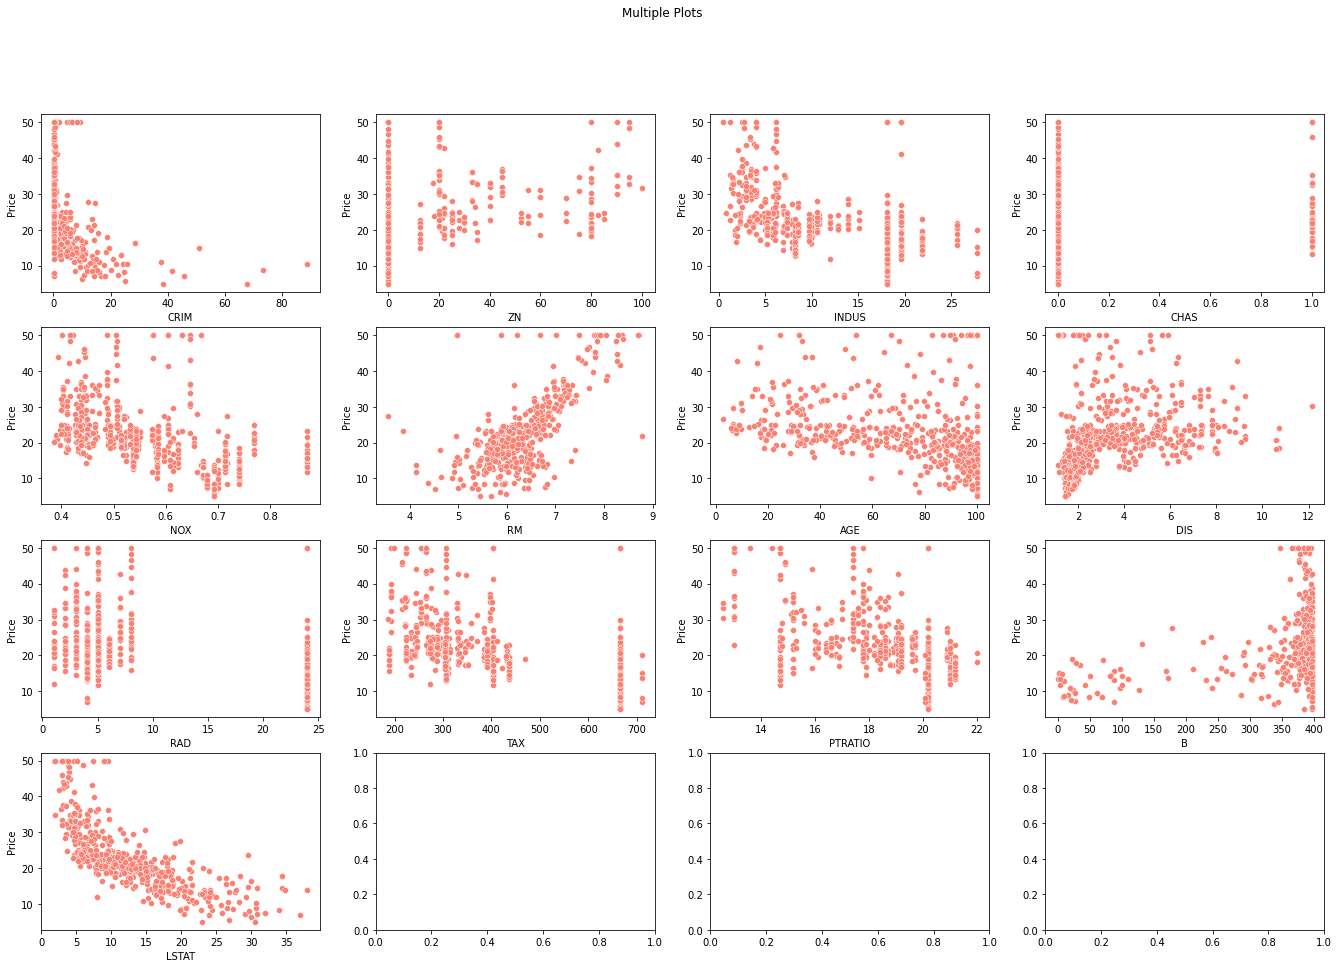

In [ ]:
import seaborn as sns
y = df['Price']
x = df.iloc[:, :-1] # all features

# normalization:
for col in x:
  x[col] = (x[col] - x[col].mean()) / x[col].std()

# represent correlations:
fig, axes = plt.subplots(4, 4, figsize = (23, 15))
fig.suptitle('Multiple Plots')
i = j = 0 
for col in x:
  sns.scatterplot(ax = axes[j, i], data = df, x = col, y = y, color = 'salmon')
  if (i == 3):
    i = 0
    j += 1
  else:
      i += 1

In [ ]:

x["Intercept"] = np.c_[np.ones(y.shape[0])] # add ones colomn to the features - for the intercept

# parameters required for Gradient Descent:
alpha = 0.05 # learning rate
m = y.size # number of samples

np.random.seed(10)  
theta = np.random.rand(x.shape[1]) # initialize thetas with random values for slope
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,1.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,1.0
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.0
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.0
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734,1.0
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355,1.0
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076,1.0
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446,1.0


In [ ]:
def gradient_descent(x, y, m, theta,  alpha):
    # x - sample features, y - target column, m - number of samples, theta - list of weights, alpha - learning rate 
    
    cost_list = []
    theta_list = []
    prediction_list = []
    run = True
    cost_list.append(1e10) # append some large value to the cost list
    i = 0

    while run:
        prediction = np.dot(x, theta) # predicted y values = theta_1*x1 + theta_2*x2 + ...
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1 / (2 * m) * np.dot(error.T, error) # (1/2m) * sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1 / m) * np.dot(x.T, error)) 
        theta_list.append(theta)
        if cost_list[i] - cost_list[i+1] < 1e-7: # check if the change in cost function is less than 10^(-9)
            run = False
        i += 1

    cost_list.pop(0) # remove the large number added in the begining
    return prediction_list, cost_list, theta_list

In [ ]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]
print(theta)

[-9.28046783e-01  1.08084715e+00  1.35481475e-01  6.83209464e-01
 -2.05778294e+00  2.67788615e+00  1.86310850e-02 -3.10751802e+00
  2.65082933e+00 -2.06289592e+00 -2.06212679e+00  8.50010320e-01
 -3.74679093e+00  2.25328063e+01]


Visualizations of the slope convergence

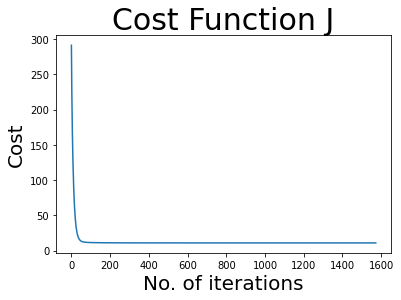

In [ ]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size = 20)
plt.ylabel('Cost', size = 20)
plt.plot(cost_list)
plt.show()

In [ ]:
def y_predicted(theta, x):
    y_pred = np.zeros(len(x))
    for i in range(0, len(x) - 1):
        for j in range(0, len(theta) - 1):
            y_pred[i] = y_pred[i] + (theta[j] * x[i][j]) # for the weights
        y_pred[i] += theta[-1] # for the bias
    return y_pred

def regression_test(x_test, theta):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row, column + 1))
    new_x_test[:, 0:column] = x_test
    y_pred = y_predicted(theta, new_x_test)
    return(y_pred)
    
pred_df = pd.DataFrame({'Actual Value': y, 'Predicted Values': np.dot(x,theta),})
print(pred_df.head(10))

   Actual Value  Predicted Values
0          24.0         30.011936
1          21.6         25.023998
2          34.7         30.567288
3          33.4         28.607213
4          36.2         27.943843
5          28.7         25.255426
6          22.9         23.000098
7          27.1         19.534053
8          16.5         11.521616
9          18.9         18.918131


We can also use the built-in MSE functions from scikit learn

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_custom_LR_Model = mean_squared_error(pred_df['Actual Value'], pred_df['Predicted Values'])
print('Linear Regression (From Scratch)', str(MSE_custom_LR_Model))

Linear Regression (From Scratch) 21.89486223655566


We got similar predictions, MSE and cost plot, compared to the implementation without vectorization.